### This code is a part of challenge for Shopify 2019 Winter Data Science Internship

### Question 1: 

    On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

b. What metric would you report for this dataset?

c. What is its value?


### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 


In [6]:
#Let' import data and look at the order amount
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data = pd.read_excel('2019 Winter Data Science Intern Challenge Data Set.xlsx')

In [11]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


#### By looking at the minimum and maximum values of the attribute order_amount, it is clear that the range is too high, lets check for outliers

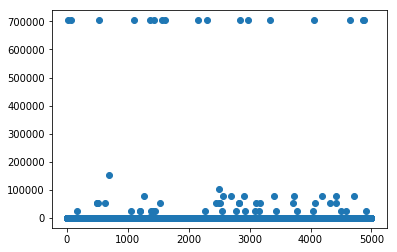

In [23]:
plt.scatter(y= data['order_amount'], x=data['order_id'])
plt.show()

### As you can see from above plot that most of the orders are between 0 and 100000 and there are many outliers near 700000. As there are many outliers, average order value(AOV) is not a good metric to represent this data.

### b. What metric would you report for this dataset?

#### -- As the average order value(AOV) is influenced by outliers, median order value(MOV) is the better metric to report for this dataset

### c. What is its value?

In [29]:
#Let's calculate the median value for the order_amount
data['order_amount'].median()

284.0

## Question 2 

For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

### a. How many orders were shipped by Speedy Express in total?

#### Query:
    SELECT COUNT(*) 
   
    FROM Orders O JOIN Shippers S
    
    ON O.ShipperID = S.ShipperID
    
    Where S.ShipperName = 'Speedy Express'
    
#### Answer:
   54

### b. What is the last name of the employee with the most orders?

##### Query::
   SELECT LastName 
   
	FROM (SELECT E.LastName, COUNT(O.OrderID) as Number_of_orders
    
    FROM Orders O LEFT OUTER JOIN Employees E
    
    ON O.EmployeeID = E.EmployeeID
    
    GROUP BY O.EmployeeID
    
    ORDER BY Number_of_orders DESC)
    
    LIMIT 1

#### Answer:
    Peacock

### c. What product was ordered the most by customers in Germany?

##### Query::
    SELECT ProductName
    
	FROM(SELECT od.OrderID,o.CustomerID, p.ProductName, c.Country, COUNT(*) AS No_Of_Orders
    
	FROM OrderDetails od JOIN Products p
    
    ON od.ProductID = p.ProductID
    
    JOIN Orders o ON od.OrderID = o.OrderID
    
    JOIN Customers c ON o.CustomerID = c.CustomerID
    
    Where c.Country = 'Germany'
    
    GROUP BY p.ProductName
    
    ORDER BY No_Of_Orders DESC)
    
    LIMIT 1
    
#### Answer:
    Gorgonzola Telino